Data Preprocessing:

In [8]:
import pandas as pd
import mne
raw = mne.io.read_raw_edf(r'..\EEG\dataset\S001\S001R04.edf', preload=True)

print(raw.info)

Extracting EDF parameters from c:\Users\sanji\Desktop\EEG\dataset\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


In [9]:
# Apply band-pass filter for the Alpha band (8-13 Hz)
raw_alpha = raw.copy().filter(8, 13, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')

# Apply band-pass filter for the Beta band (13-30 Hz)
raw_beta = raw.copy().filter(13, 30, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')
# Optionally, save the filtered data to new EDF files (if needed)
# raw_alpha.save('/mnt/data/S001R01_alpha.edf', overwrite=True)
# raw_beta.save('/mnt/data/S001R01_beta.edf', overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 529 samples (3.306 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 30.50 Hz)
- Filter length: 529 samples (3.306 s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


In [10]:
# Assuming 'raw' is your preloaded MNE-Python Raw object
data, times = raw[:, :]

# Correctly creating DataFrame for EEG data
df_data = pd.DataFrame(data.transpose(), columns=raw.ch_names)

# Correctly creating DataFrame for time points
# Note: Only a single column, so we name it 'Time'
df_times = pd.DataFrame(times, columns=['Time'])

# Display the first few rows of each DataFrame
print(df_data.head(5))  # Display the first few rows of EEG data
print(df_times.head(5))  # Display the first few time points

       Fc5.      Fc3.      Fc1.      Fcz.      Fc2.      Fc4.      Fc6.  \
0 -0.000005  0.000002  0.000037  0.000039  0.000030  0.000026 -0.000016   
1 -0.000012 -0.000024  0.000001 -0.000002 -0.000015 -0.000022 -0.000055   
2 -0.000077 -0.000078 -0.000059 -0.000065 -0.000063 -0.000055 -0.000067   
3 -0.000066 -0.000067 -0.000050 -0.000065 -0.000060 -0.000055 -0.000068   
4 -0.000045 -0.000055 -0.000033 -0.000053 -0.000054 -0.000063 -0.000083   

       C5..      C3..      C1..  ...      P8..      Po7.      Po3.      Poz.  \
0 -0.000014  0.000004  0.000018  ... -0.000021 -0.000008 -0.000035 -0.000045   
1 -0.000036 -0.000027 -0.000025  ... -0.000050 -0.000040 -0.000068 -0.000065   
2 -0.000088 -0.000071 -0.000065  ... -0.000017 -0.000022 -0.000050 -0.000035   
3 -0.000062 -0.000053 -0.000054  ... -0.000039 -0.000060 -0.000078 -0.000064   
4 -0.000052 -0.000050 -0.000053  ... -0.000044 -0.000055 -0.000070 -0.000054   

       Po4.      Po8.      O1..      Oz..      O2..      Iz..  
0 -0

In [11]:
print(raw.ch_names)

# Example renaming of channels to match the 'standard_1020' montage
# Example renaming of channels to match the 'standard_1020' montage
new_names = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
    'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
    'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
    'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2',
    'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
    'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
    'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10',
    'Tp7.': 'TP7', 'Tp8.': 'TP8',
    'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 
    'Iz..': 'Iz'
}

raw.rename_channels(new_names)

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\sanji\AppData\Local\Temp\ipykernel_17688\2976475200.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 0.9s.


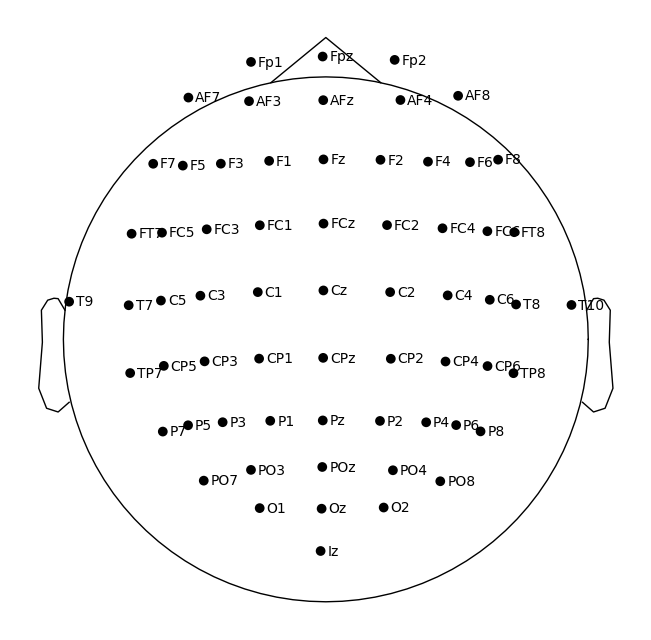

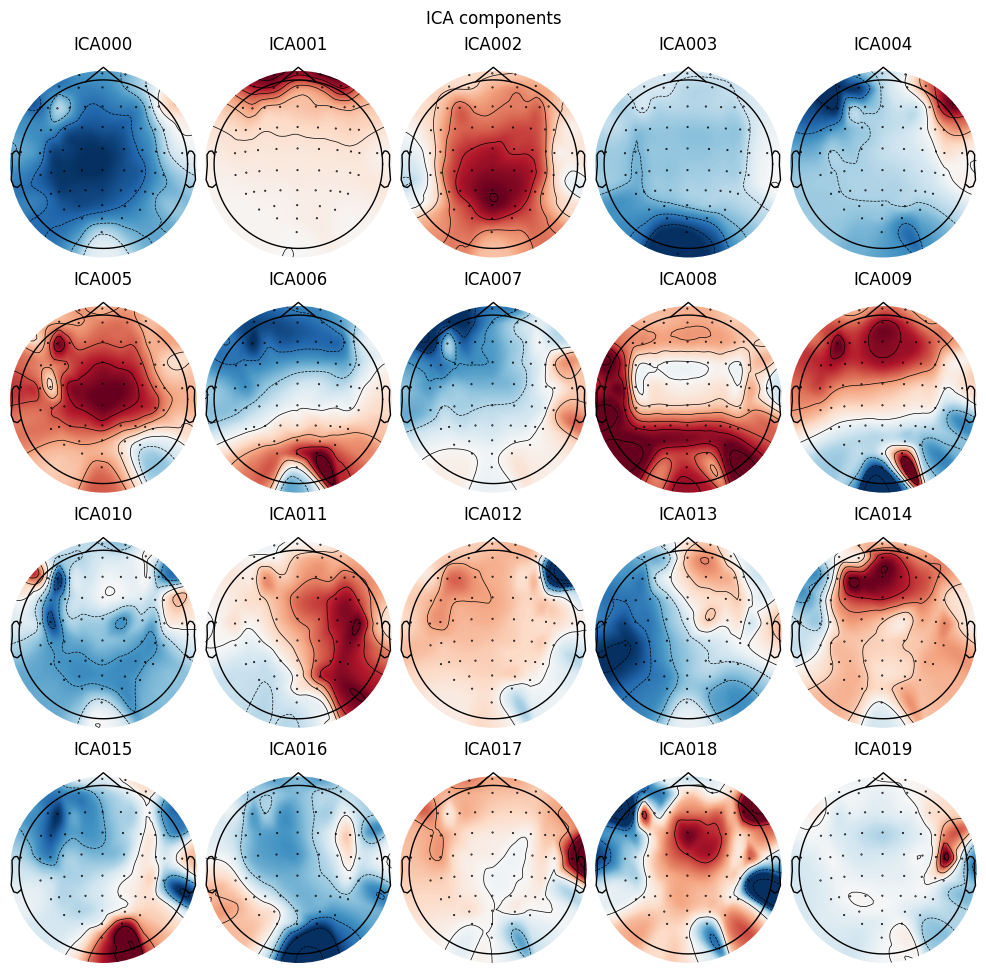

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


In [14]:
from mne.preprocessing import ICA
# Set up and fit the ICA
ica = ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)

#Set the montage for the dataset
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

raw.plot_sensors(show_names=True)
# Plot the ICA components to visually identify artifact components
ica.plot_components()

# Once you've identified components that represent artifacts, you can exclude them
# Example: Assuming components 0 and 1 are artifacts
ica.exclude = [0, 1]

# Apply the ICA solution to the Raw data, effectively removing the artifacts
ica.apply(raw)

# Optional: Save the cleaned data to a new file
# raw.save('/mnt/data/S001R01_cleaned.edf', overwrite=True)

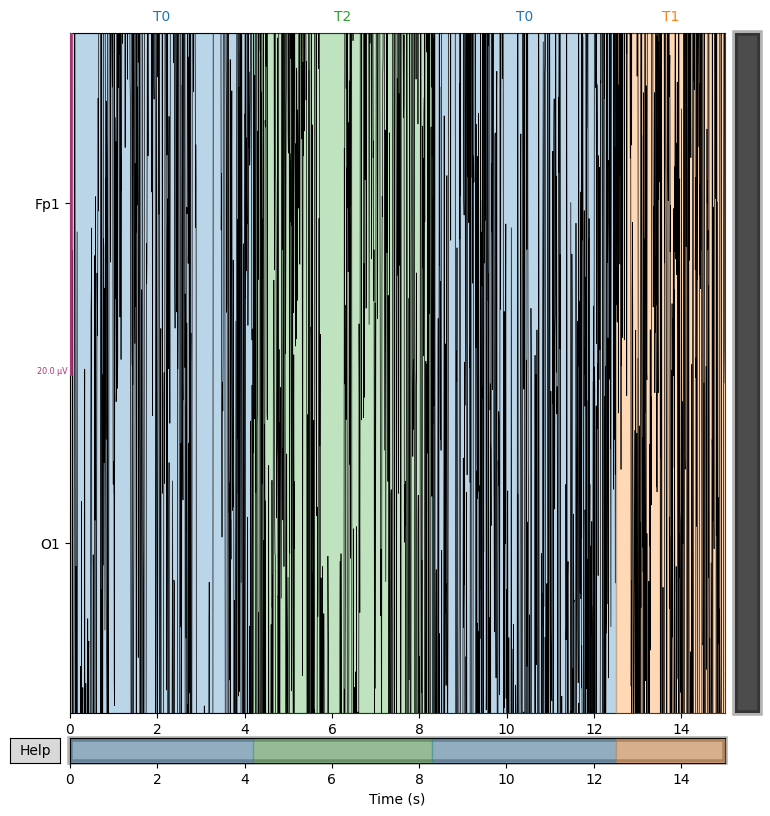

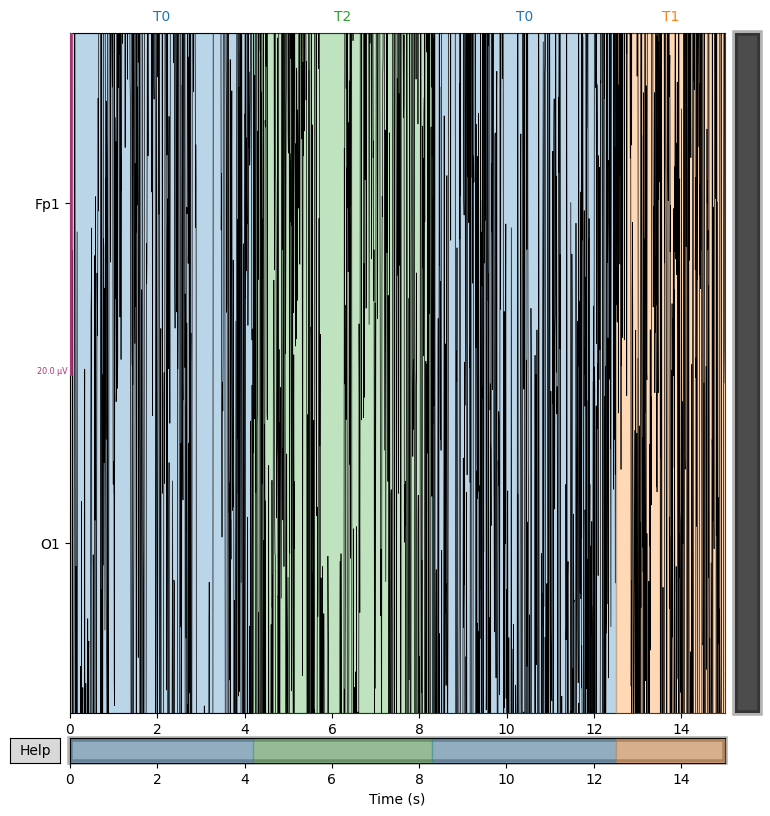

In [29]:
# Specify the start time and duration of the period of interest in seconds
start_time = 0  # Start at 60 seconds
duration = 15  # Duration of 30 seconds

# Crop the raw object to only include the 30-second period of interest
raw_cropped = raw.copy().crop(tmin=start_time, tmax=start_time + duration)

# Specify the channels of interest
channels_of_interest = ['Fp1', 'O1']

# Find the index of the channels of interest in the cropped data
channel_indexes = [raw_cropped.ch_names.index(ch) for ch in channels_of_interest if ch in raw_cropped.ch_names]

# Visualize the cropped segment for the specified channels
raw_cropped.plot(order=channel_indexes, duration=duration, scalings=dict(eeg=1e-5), title='Selected Time Period for Specific Channels')


In [31]:
import plotly.graph_objects as go


# Initialize a Plotly figure
fig = go.Figure()

# Loop through each channel of interest to plot
for ch_name in channels_of_interest:
    # Extract data and times for the current channel
    ch_idx = raw_cropped.ch_names.index(ch_name)  # Get channel index
    data, times = raw_cropped[ch_idx, :]  # Extract data for this channel
    
    # Add a trace for this channel's data
    fig.add_trace(go.Scatter(x=times, y=data[0], mode='lines', name=ch_name))

# Update the layout of the figure
fig.update_layout(
    title='EEG Data Over Selected Time Period',
    xaxis_title='Time (s)',
    yaxis_title='Amplitude (µV)',
    legend_title='Channel'
)

# Display the figure
fig.show()

In [38]:
# Extract data for channels of interest - this part is assumed to be correct
data, times = raw_cropped[channel_indexes, :]

# Correctly create an Info object for the Evoked data
info = mne.create_info(ch_names=channels_of_interest, 
                       sfreq=raw.info['sfreq'], 
                       ch_types='eeg')

# Create the Evoked object
evoked = mne.EvokedArray(data, info, tmin=0)

Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\sanji\AppData\Local\Temp\ipykernel_17688\594825037.py:3: RuntimeWarning:

The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.



Selecting by number: 20 components
Fitting ICA took 1.7s.


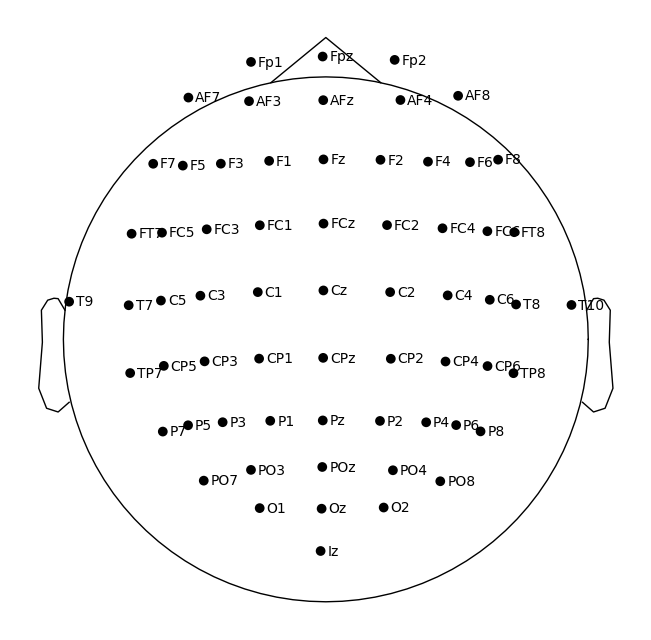

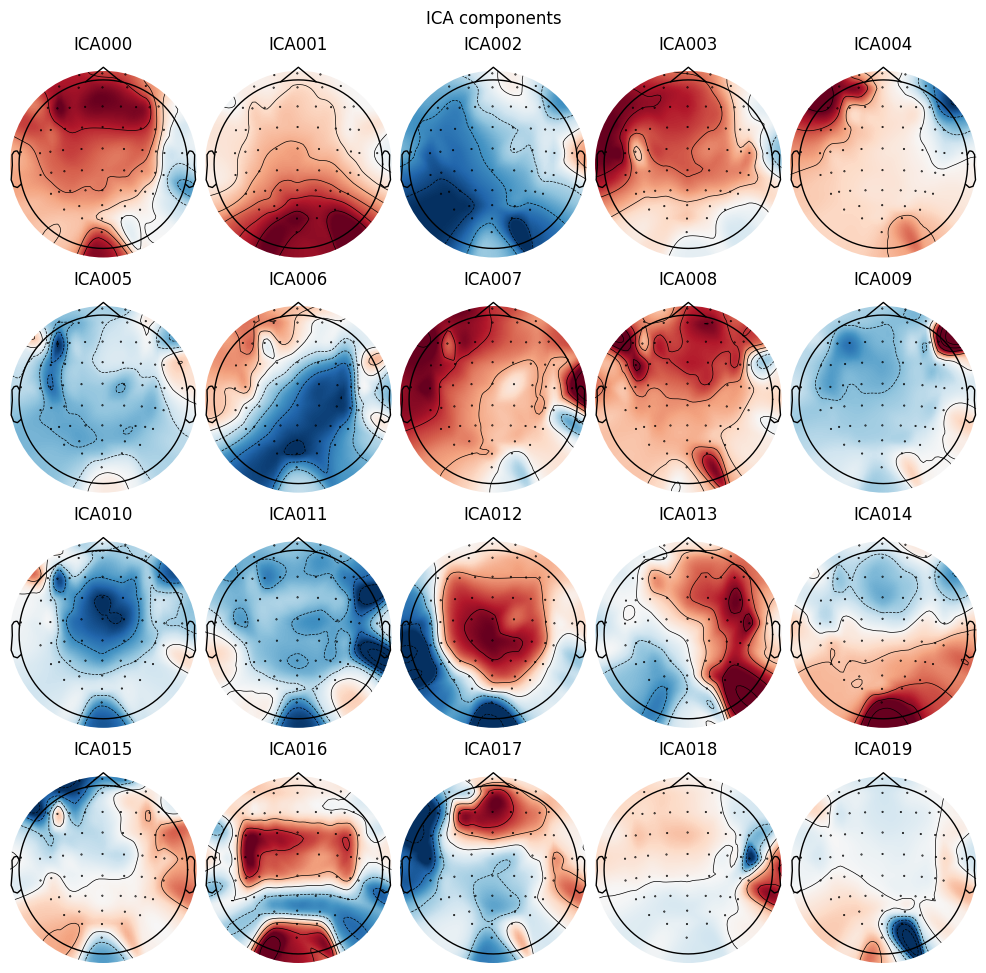

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


In [41]:
# Set up and fit the ICA
ica = ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)

#Set the montage for the dataset
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

raw.plot_sensors(show_names=True)
# Plot the ICA components to visually identify artifact components
ica.plot_components()

# Once you've identified components that represent artifacts, you can exclude them
# Example: Assuming components 0 and 1 are artifacts
ica.exclude = [0, 1]

# Apply the ICA solution to the Raw data, effectively removing the artifacts
ica.apply(raw_cropped)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


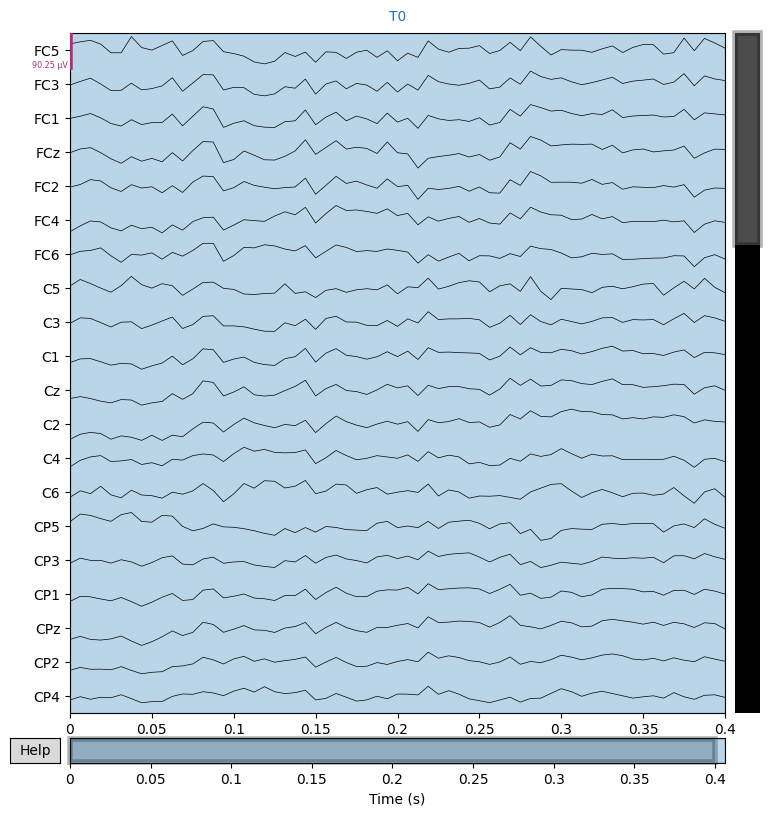

RuntimeError: No digitization points found.

In [48]:
montage = mne.channels.make_standard_montage('standard_1020')
raw_cropped.set_montage(montage)
raw_cropped.set_eeg_reference('average', projection=True)
# Visualize specific channels over a time range in the raw data
# Find channel indices

# Apply projection
raw_cropped.apply_proj()

# Plot the data for the specified channels
raw_cropped.plot(scalings='auto', duration=10, start=0)
evoked.plot_topomap(times=[0, 0.1, 0.2], ch_type='eeg')


ModuleNotFoundError: No module named 'lobe'